In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)

import numpy as np
import pandas as pd

c:\Users\jaesc2\GitHub\skforecast


In [2]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from skforecast.datasets import fetch_dataset
from skforecast.preprocessing import RollingFeatures
from skforecast.direct import ForecasterDirect
from skforecast.plot import set_dark_theme

c:\Users\jaesc2\Miniconda3\envs\skforecast_py13\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


h2o
---
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice(3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,https://github.com/robjhyndman
/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (204, 2)


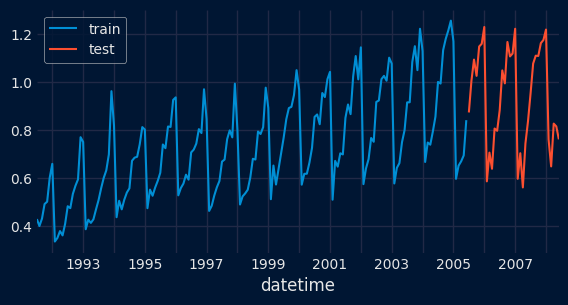

In [3]:
# Download data
# ==============================================================================
data = fetch_dataset(
    name="h2o", raw=True, kwargs_read_csv={"names": ["y", "datetime"], "header": 0}
)

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
set_dark_theme()
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [4]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterDirect(
                 regressor       = Ridge(),
                 steps           = 36,
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=10)
             )

forecaster.fit(y=data_train)
forecaster

================ 
ForecasterDirect 
================ 
Regressor: Ridge 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window features: ['roll_mean_10'] 
Window size: 15 
Maximum steps to predict: 36 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: 
    {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None,
    'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2025-04-01 12:05:13 
Last fit date: 2025-04-01 12:05:13 
Skforecast version: 0.16.0 
Python version: 3.13.2 
Forecaster id: None

In [5]:
forecaster.in_sample_residuals_

In [6]:
forecaster.set_in_sample_residuals(y=data_train)

In [7]:
forecaster.in_sample_residuals_

array([-0.0113347 , -0.00968602,  0.10731831, ..., -0.05670915,
       -0.09992736,  0.01794368])

In [8]:
forecaster.in_sample_residuals_by_bin_

{0: array([-0.11014924, -0.01043194, -0.04097584, -0.01648869, -0.0176257 ,
        -0.03009251,  0.00121497, -0.1106225 ,  0.01584208, -0.02018466,
         0.01704123,  0.00450171, -0.01570779, -0.08713966,  0.0246862 ,
        -0.01387525,  0.00123866, -0.0068164 , -0.03185998,  0.08888013,
        -0.09991971, -0.02711171, -0.04450165, -0.02075195, -0.0225581 ,
        -0.03422735, -0.00386838, -0.10321697, -0.00144096, -0.01916887,
         0.01606962,  0.00403556, -0.08618772,  0.01185118, -0.00442521,
         0.0034715 , -0.0183423 , -0.02979133, -0.09209499, -0.02068906,
        -0.05160252, -0.02296042, -0.02054824, -0.03626617, -0.00674044,
        -0.09023639,  0.00350945, -0.02848119,  0.01633638,  0.00759186,
        -0.09433255,  0.01369693, -0.00994712,  0.01547693, -0.08084788,
        -0.0166738 , -0.03386093,  0.08442684, -0.08987239, -0.01006981,
        -0.04311868, -0.02727423, -0.01823545, -0.03289642, -0.00755413,
        -0.08816918,  0.01795351, -0.02292337,  